In [2]:
import numpy as np
import pandas as pd


In [8]:
data_link = 'https://drive.google.com/uc?id=1E3T8i1akfm6NnT42AWEE6U1t7uvwreYK'
data = pd.read_csv(data_link)

In [10]:
data.head()

,Port_IDs,Trade_History
0,3925368433214965504,"[{'time': 1718899656000, 'symbol': 'SOLUSDT', ..."
1,4002413037164645377,"[{'time': 1718980078000, 'symbol': 'NEARUSDT',..."
2,3923766029921022977,"[{'time': 1718677164000, 'symbol': 'ETHUSDT', ..."
3,3994879592543698688,"[{'time': 1718678214000, 'symbol': 'ETHUSDT', ..."
4,3926423286576838657,"[{'time': 1718979615000, 'symbol': 'ETHUSDT', ..."


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Port_IDs       150 non-null    int64 
 1   Trade_History  149 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.5+ KB


In [12]:
data

,Port_IDs,Trade_History
0,3925368433214965504,"[{'time': 1718899656000, 'symbol': 'SOLUSDT', ..."
1,4002413037164645377,"[{'time': 1718980078000, 'symbol': 'NEARUSDT',..."
2,3923766029921022977,"[{'time': 1718677164000, 'symbol': 'ETHUSDT', ..."
3,3994879592543698688,"[{'time': 1718678214000, 'symbol': 'ETHUSDT', ..."
4,3926423286576838657,"[{'time': 1718979615000, 'symbol': 'ETHUSDT', ..."
...,...,...
145,4000222729738650369,"[{'time': 1718982068000, 'symbol': 'ARKMUSDT',..."
146,3998659472131949824,"[{'time': 1718979385000, 'symbol': 'BTCUSDT', ..."
147,4028701921959171840,"[{'time': 1718984241000, 'symbol': 'BTCUSDT', ..."
148,4014818740371615232,"[{'time': 1718983357000, 'symbol': 'SOLUSDT', ..."


In [15]:
data['Trade_History']

0      [{'time': 1718899656000, 'symbol': 'SOLUSDT', ...
1      [{'time': 1718980078000, 'symbol': 'NEARUSDT',...
2      [{'time': 1718677164000, 'symbol': 'ETHUSDT', ...
3      [{'time': 1718678214000, 'symbol': 'ETHUSDT', ...
4      [{'time': 1718979615000, 'symbol': 'ETHUSDT', ...
                             ...                        
145    [{'time': 1718982068000, 'symbol': 'ARKMUSDT',...
146    [{'time': 1718979385000, 'symbol': 'BTCUSDT', ...
147    [{'time': 1718984241000, 'symbol': 'BTCUSDT', ...
148    [{'time': 1718983357000, 'symbol': 'SOLUSDT', ...
149    [{'time': 1718977395000, 'symbol': 'BNBUSDT', ...
Name: Trade_History, Length: 150, dtype: object

In [16]:
data_exploded = data.explode('Trade_History',ignore_index=True)

In [17]:
data_exploded

,Port_IDs,Trade_History
0,3925368433214965504,"[{'time': 1718899656000, 'symbol': 'SOLUSDT', ..."
1,4002413037164645377,"[{'time': 1718980078000, 'symbol': 'NEARUSDT',..."
2,3923766029921022977,"[{'time': 1718677164000, 'symbol': 'ETHUSDT', ..."
3,3994879592543698688,"[{'time': 1718678214000, 'symbol': 'ETHUSDT', ..."
4,3926423286576838657,"[{'time': 1718979615000, 'symbol': 'ETHUSDT', ..."
...,...,...
145,4000222729738650369,"[{'time': 1718982068000, 'symbol': 'ARKMUSDT',..."
146,3998659472131949824,"[{'time': 1718979385000, 'symbol': 'BTCUSDT', ..."
147,4028701921959171840,"[{'time': 1718984241000, 'symbol': 'BTCUSDT', ..."
148,4014818740371615232,"[{'time': 1718983357000, 'symbol': 'SOLUSDT', ..."


In [18]:
trade_details = pd.json_normalize(data_exploded['Trade_History'])

In [19]:
# Step 3: Combine with the original DataFrame and set the MultiIndex
data_multi_index = pd.concat([data_exploded[['Port_IDs']], trade_details], axis=1)
data_multi_index.set_index(['Port_IDs', data_multi_index.index], inplace=True)
data_multi_index.index.names = ['Port_IDs', 'Trade_Index']


In [21]:
print(data_multi_index.tail())

Empty DataFrame
Columns: []
Index: [(4000222729738650369, 145), (3998659472131949824, 146), (4028701921959171840, 147), (4014818740371615232, 148), (3768170840939476993, 149)]


In [22]:
import pandas as pd
import json

def convert_to_multiindex_dataframe(data):
    """
    Convert trade history data to a multi-index DataFrame.
    
    Parameters:
    data : list of tuples 
        Each tuple contains (Port_ID, Trade_History)
        Trade_History is a list of dictionaries
    
    Returns:
    pandas.DataFrame : Multi-index DataFrame with trade details
    """
    # Prepare lists to store data
    port_ids = []
    trade_details = []
    
    # Iterate through the data
    for port_id, trade_history in data:
        # If trade_history is a string (in case it's a JSON string), parse it
        if isinstance(trade_history, str):
            try:
                trade_history = json.loads(trade_history)
            except json.JSONDecodeError:
                print(f"Could not parse trade history for Port ID {port_id}")
                continue
        
        # Expand trade history for each port ID
        for trade in trade_history:
            port_ids.append(port_id)
            trade_details.append(trade)
    
    # Create DataFrame
    df = pd.DataFrame(trade_details)
    
    # Create multi-index
    df.index = pd.MultiIndex.from_arrays([port_ids, range(len(port_ids))], 
                                         names=['Port_ID', 'Trade_Index'])
    
    return df

# Example usage:
# Assuming your data is in a list of tuples format
# data = [(Port_ID1, Trade_History1), (Port_ID2, Trade_History2), ...]
# multi_index_df = convert_to_multiindex_dataframe(data)
# print(multi_index_df)

In [23]:
multi_index_df = convert_to_multiindex_dataframe(data)
print(multi_index_df)

ValueError: too many values to unpack (expected 2)

In [26]:
import pandas as pd
import ast
import json

def convert_to_multiindex_dataframe(df):
    """
    Convert a DataFrame with trade history columns to a multi-index DataFrame.
    
    Parameters:
    df : pandas.DataFrame
        DataFrame with Port_IDs and Trade_History columns
    
    Returns:
    pandas.DataFrame : Multi-index DataFrame with trade details
    """
    # Prepare lists to store data
    port_ids = []
    trade_details = []
    
    # Iterate through the rows of the original DataFrame
    for index, row in df.iterrows():
        # Extract Port_ID and Trade_History
        port_id = row['Port_IDs']
        trade_history = row['Trade_History']
        
        # Skip if trade_history is NaN or not a list/dict
        if pd.isna(trade_history):
            continue
        
        # Handle different possible input formats
        if isinstance(trade_history, str):
            try:
                # Try parsing as a literal (if it looks like a list/dict)
                trade_history = ast.literal_eval(trade_history)
            except (SyntaxError, ValueError):
                try:
                    # If literal_eval fails, try json
                    trade_history = json.loads(trade_history)
                except:
                    print(f"Could not parse trade history for Port ID {port_id}")
                    continue
        
        # Ensure trade_history is a list
        if not isinstance(trade_history, list):
            print(f"Unexpected trade history format for Port ID {port_id}: {type(trade_history)}")
            continue
        
        # Expand trade history for each port ID
        for trade in trade_history:
            port_ids.append(port_id)
            trade_details.append(trade)
    
    # Create DataFrame
    multi_index_df = pd.DataFrame(trade_details)
    
    # Create multi-index
    multi_index_df.index = pd.MultiIndex.from_arrays([port_ids, range(len(port_ids))], 
                                                     names=['Port_ID', 'Trade_Index'])
    
    return multi_index_df

# Debugging tips:
# Print out the types and values in your original DataFrame to understand the data
# print(data['Trade_History'].apply(type))
# print(data['Trade_History'])

In [28]:
multi_index_df = convert_to_multiindex_dataframe(data)
print(multi_index_df)

                                          time     symbol  side       price   
Port_ID             Trade_Index                                               
3925368433214965504 0            1718899656000    SOLUSDT   BUY  132.537000  \
                    1            1718899618000   DOGEUSDT   BUY    0.121820   
                    2            1718899618000   DOGEUSDT   BUY    0.121820   
                    3            1718899616000   DOGEUSDT   BUY    0.121820   
                    4            1718899616000   DOGEUSDT   BUY    0.121820   
...                                        ...        ...   ...         ...   
3768170840939476993 211272       1718549875000  JASMYUSDT  SELL    0.035968   
                    211273       1718549875000  JASMYUSDT  SELL    0.035968   
                    211274       1718549875000  JASMYUSDT  SELL    0.035969   
                    211275       1718549875000  JASMYUSDT  SELL    0.035969   
                    211276       1718549875000  JASM

In [29]:
multi_index_df

time     symbol  side       price   
Port_ID             Trade_Index                                               
3925368433214965504 0            1718899656000    SOLUSDT   BUY  132.537000  \
                    1            1718899618000   DOGEUSDT   BUY    0.121820   
                    2            1718899618000   DOGEUSDT   BUY    0.121820   
                    3            1718899616000   DOGEUSDT   BUY    0.121820   
                    4            1718899616000   DOGEUSDT   BUY    0.121820   
...                                        ...        ...   ...         ...   
3768170840939476993 211272       1718549875000  JASMYUSDT  SELL    0.035968   
                    211273       1718549875000  JASMYUSDT  SELL    0.035968   
                    211274       1718549875000  JASMYUSDT  SELL    0.035969   
                    211275       1718549875000  JASMYUSDT  SELL    0.035969   
                    211276       1718549875000  JASMYUSDT  SELL    0.035972   

                                      fee feeAsset     quantity quantityAsset   
Port_ID             Trade_Index                                                 
3925368433214965504 0           -0.994027     USDT  1988.055000          USDT  \
                    1           -0.279796     USDT  1398.980880          USDT   
                    2           -0.039494     USDT   197.470220          USDT   
                    3           -0.008284     USDT    16.567520          USDT   
                    4           -0.046109     USDT    92.217740          USDT   
...                                   ...      ...          ...           ...   
3768170840939476993 211272      -0.025070     USDT    50.139392          USDT   
                    211273      -0.008255     USDT    16.509312          USDT   
                    211274      -0.031545     USDT    63.089626          USDT   
                    211275      -0.031905     USDT    63.809006          USDT   
                    211276      -0.005018     USDT    10.036188          USDT   

                                 realizedProfit realizedProfitAsset baseAsset   
Port_ID             Trade_Index                                                 
3925368433214965504 0                       0.0                USDT       SOL  \
                    1                       0.0                USDT      DOGE   
                    2                       0.0                USDT      DOGE   
                    3                       0.0                USDT      DOGE   
                    4                       0.0                USDT      DOGE   
...                                         ...                 ...       ...   
3768170840939476993 211272                  0.0                USDT     JASMY   
                    211273                  0.0                USDT     JASMY   
                    211274                  0.0                USDT     JASMY   
                    211275                  0.0                USDT     JASMY   
                    211276                  0.0                USDT     JASMY   

                                     qty positionSide  activeBuy  
Port_ID             Trade_Index                                   
3925368433214965504 0               15.0         LONG       True  
                    1            11484.0         LONG      False  
                    2             1621.0         LONG      False  
                    3              136.0         LONG       True  
                    4              757.0         LONG       True  
...                                  ...          ...        ...  
3768170840939476993 211272        1394.0         BOTH      False  
                    211273         459.0         BOTH      False  
                    211274        1754.0         BOTH      False  
                    211275        1774.0         BOTH      False  
                    211276         279.0         BOTH      False  

[211277 rows x 14 columns]

In [30]:
multi_index_df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 211277 entries, (3925368433214965504, 0) to (3768170840939476993, 211276)
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   time                 211277 non-null  int64  
 1   symbol               211277 non-null  object 
 2   side                 211277 non-null  object 
 3   price                211277 non-null  float64
 4   fee                  211277 non-null  float64
 5   feeAsset             211277 non-null  object 
 6   quantity             211277 non-null  float64
 7   quantityAsset        211277 non-null  object 
 8   realizedProfit       211277 non-null  float64
 9   realizedProfitAsset  211277 non-null  object 
 10  baseAsset            211277 non-null  object 
 11  qty                  211277 non-null  float64
 12  positionSide         211277 non-null  object 
 13  activeBuy            211277 non-null  bool   
dtypes: bool(1), float64(5)

In [35]:
multi_index_df

time     symbol  side       price   
Port_ID             Trade_Index                                               
3925368433214965504 0            1718899656000    SOLUSDT   BUY  132.537000  \
                    1            1718899618000   DOGEUSDT   BUY    0.121820   
                    2            1718899618000   DOGEUSDT   BUY    0.121820   
                    3            1718899616000   DOGEUSDT   BUY    0.121820   
                    4            1718899616000   DOGEUSDT   BUY    0.121820   
...                                        ...        ...   ...         ...   
3768170840939476993 211272       1718549875000  JASMYUSDT  SELL    0.035968   
                    211273       1718549875000  JASMYUSDT  SELL    0.035968   
                    211274       1718549875000  JASMYUSDT  SELL    0.035969   
                    211275       1718549875000  JASMYUSDT  SELL    0.035969   
                    211276       1718549875000  JASMYUSDT  SELL    0.035972   

                                      fee feeAsset     quantity quantityAsset   
Port_ID             Trade_Index                                                 
3925368433214965504 0           -0.994027     USDT  1988.055000          USDT  \
                    1           -0.279796     USDT  1398.980880          USDT   
                    2           -0.039494     USDT   197.470220          USDT   
                    3           -0.008284     USDT    16.567520          USDT   
                    4           -0.046109     USDT    92.217740          USDT   
...                                   ...      ...          ...           ...   
3768170840939476993 211272      -0.025070     USDT    50.139392          USDT   
                    211273      -0.008255     USDT    16.509312          USDT   
                    211274      -0.031545     USDT    63.089626          USDT   
                    211275      -0.031905     USDT    63.809006          USDT   
                    211276      -0.005018     USDT    10.036188          USDT   

                                 realizedProfit realizedProfitAsset baseAsset   
Port_ID             Trade_Index                                                 
3925368433214965504 0                       0.0                USDT       SOL  \
                    1                       0.0                USDT      DOGE   
                    2                       0.0                USDT      DOGE   
                    3                       0.0                USDT      DOGE   
                    4                       0.0                USDT      DOGE   
...                                         ...                 ...       ...   
3768170840939476993 211272                  0.0                USDT     JASMY   
                    211273                  0.0                USDT     JASMY   
                    211274                  0.0                USDT     JASMY   
                    211275                  0.0                USDT     JASMY   
                    211276                  0.0                USDT     JASMY   

                                     qty positionSide  activeBuy  
Port_ID             Trade_Index                                   
3925368433214965504 0               15.0         LONG       True  
                    1            11484.0         LONG      False  
                    2             1621.0         LONG      False  
                    3              136.0         LONG       True  
                    4              757.0         LONG       True  
...                                  ...          ...        ...  
3768170840939476993 211272        1394.0         BOTH      False  
                    211273         459.0         BOTH      False  
                    211274        1754.0         BOTH      False  
                    211275        1774.0         BOTH      False  
                    211276         279.0         BOTH      False  

[211277 rows x 14 columns]

In [42]:
multi_index_df.loc[(3925368433214965504, 2), 'side']

'BUY'

In [45]:
multi_index_df.iloc[(3768170840939476993, 0), 'time']

IndexingError: Too many indexers

In [54]:
port_trades = multi_index_df.loc[3768170840939476993]

# Then use .iloc[] on those trades
port_trades.iloc[3]['price']

0.027319

In [56]:
multi_index_df.columns

Index(['time', 'symbol', 'side', 'price', 'fee', 'feeAsset', 'quantity',
       'quantityAsset', 'realizedProfit', 'realizedProfitAsset', 'baseAsset',
       'qty', 'positionSide', 'activeBuy'],
      dtype='object')

In [60]:
multi_index_df.isnull().sum()

time                   0
symbol                 0
side                   0
price                  0
fee                    0
feeAsset               0
quantity               0
quantityAsset          0
realizedProfit         0
realizedProfitAsset    0
baseAsset              0
qty                    0
positionSide           0
activeBuy              0
dtype: int64

In [61]:
print(multi_index_df.dtypes)

time                     int64
symbol                  object
side                    object
price                  float64
fee                    float64
feeAsset                object
quantity               float64
quantityAsset           object
realizedProfit         float64
realizedProfitAsset     object
baseAsset               object
qty                    float64
positionSide            object
activeBuy                 bool
dtype: object


In [64]:
print(multi_index_df['side'].unique())

['BUY' 'SELL']


In [65]:
print(multi_index_df['symbol'].unique())

['SOLUSDT' 'DOGEUSDT' 'FILUSDT' 'ETCUSDT' 'BCHUSDT' 'BTCUSDT' 'BNBUSDT'
 'ETHUSDT' 'NEARUSDT' 'JTOUSDT' 'COMPUSDT' 'HOTUSDT' 'WUSDT' 'WIFUSDT'
 '1000PEPEUSDT' 'JASMYUSDT' 'LDOUSDT' 'ORDIUSDT' 'INJUSDT' 'WLDUSDT'
 'DOTUSDT' 'ROSEUSDT' 'ADAUSDT' 'SSVUSDT' 'STXUSDT' '1000FLOKIUSDT'
 'ARUSDT' 'CHZUSDT' '1000BONKUSDT' 'PENDLEUSDT' 'LINKUSDT' '1000SHIBUSDT'
 'AVAXUSDT' 'ONDOUSDT' 'BBUSDT' '1000SATSUSDT' 'ENSUSDT' 'RUNEUSDT'
 'PYTHUSDT' 'IMXUSDT' 'SFPUSDT' 'UMAUSDT' 'MATICUSDT' 'AAVEUSDT' 'SUIUSDT'
 'TIAUSDT' 'BLURUSDT' 'ICPUSDT' 'FTMUSDT' 'FXSUSDT' 'LPTUSDT' 'MANTAUSDT'
 'BIGTIMEUSDT' 'ARKMUSDT' 'CRVUSDT' 'FETUSDT' 'CFXUSDT' 'UNIUSDT'
 'TNSRUSDT' 'XMRUSDT' 'XEMUSDT' 'IOTXUSDT' 'CKBUSDT' 'BOMEUSDT' 'HBARUSDT'
 '1000RATSUSDT' 'ACEUSDT' 'CVXUSDT' 'ENAUSDT' 'RNDRUSDT' 'EOSUSDT'
 'LOOMUSDT' 'AIUSDT' 'ONTUSDT' 'AGIXUSDT' 'XRPUSDT' 'KSMUSDT' 'TRXUSDT'
 'WAVESUSDT' 'LTCUSDT' 'OPUSDT' 'ARBUSDT' 'XAIUSDT' 'APTUSDT' 'SEIUSDT'
 'THETAUSDT' 'IOSTUSDT' 'LQTYUSDT' 'ATOMUSDT' 'SKLUSDT' 'ALGOUSDT'
 'IDUSDT' 

In [66]:
print(multi_index_df['positionSide'].unique())

['LONG' 'SHORT' 'BOTH']


In [68]:
# Descriptive statistics for numerical columns
numeric_columns = ['price', 'quantity', 'realizedProfit']
print(multi_index_df[numeric_columns].describe())

               price       quantity  realizedProfit
count  211277.000000  211277.000000   211277.000000
mean     4129.040315     975.509483        3.270818
std     15363.534288    4667.098916       57.895095
min         0.000158       0.006694    -3269.194444
25%         0.143830      23.340915        0.000000
50%         2.483300     127.775000        0.000000
75%        44.621000     404.012000        0.577590
max     72105.000000  602293.260000     8186.254058


In [69]:
def detect_outliers_iqr(df, column):
    """
    Detect outliers using the IQR method.
    
    Parameters:
    -----------
    df : pd.DataFrame
        DataFrame containing the column to inspect.
    column : str
        Column name to inspect for outliers.
    
    Returns:
    --------
    pd.DataFrame
        DataFrame with outliers flagged.
    """
    Q1 = df[column].quantile(0.25)  # First quartile
    Q3 = df[column].quantile(0.75)  # Third quartile
    IQR = Q3 - Q1  # Interquartile range
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Flag outliers
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]


In [72]:

# Example: Detect outliers in the 'price' column
outliers_price = detect_outliers_iqr(multi_index_df, 'price')
outliers_price

time   symbol  side     price   
Port_ID             Trade_Index                                           
3925368433214965504 0            1718899656000  SOLUSDT   BUY   132.537  \
                    7            1718899607000  SOLUSDT   BUY   132.585   
                    8            1718899607000  SOLUSDT   BUY   132.585   
                    88           1718674515000  SOLUSDT   BUY   137.027   
                    89           1718674515000  SOLUSDT   BUY   137.027   
...                                        ...      ...   ...       ...   
4014818740371615232 211259       1717315317000  ETHUSDT  SELL  3788.620   
                    211260       1717309286000  ETHUSDT   BUY  3813.880   
                    211261       1717309286000  ETHUSDT   BUY  3813.880   
                    211262       1717309286000  ETHUSDT   BUY  3813.880   
3768170840939476993 211263       1718977395000  BNBUSDT  SELL   580.630   

                                      fee feeAsset    quantity quantityAsset   
Port_ID             Trade_Index                                                
3925368433214965504 0           -0.994027     USDT  1988.05500          USDT  \
                    7           -0.159102     USDT   795.51000          USDT   
                    8           -0.596633     USDT  1193.26500          USDT   
                    88          -0.753649     USDT  1507.29700          USDT   
                    89          -0.205540     USDT   411.08100          USDT   
...                                   ...      ...         ...           ...   
4014818740371615232 211259      -2.473969     USDT  4947.93772          USDT   
                    211260      -2.225399     USDT  4450.79796          USDT   
                    211261      -0.028604     USDT    57.20820          USDT   
                    211262      -0.236461     USDT   472.92112          USDT   
3768170840939476993 211263      -0.199737     USDT   998.68360          USDT   

                                 realizedProfit realizedProfitAsset baseAsset   
Port_ID             Trade_Index                                                 
3925368433214965504 0                   0.00000                USDT       SOL  \
                    7                   0.00000                USDT       SOL   
                    8                   0.00000                USDT       SOL   
                    88                  0.00000                USDT       SOL   
                    89                  0.00000                USDT       SOL   
...                                         ...                 ...       ...   
4014818740371615232 211259            -32.98956                USDT       ETH   
                    211260              0.00000                USDT       ETH   
                    211261              0.00000                USDT       ETH   
                    211262              0.00000                USDT       ETH   
3768170840939476993 211263              0.00000                USDT       BNB   

                                    qty positionSide  activeBuy  
Port_ID             Trade_Index                                  
3925368433214965504 0            15.000         LONG       True  
                    7             6.000         LONG      False  
                    8             9.000         LONG       True  
                    88           11.000         LONG       True  
                    89            3.000         LONG       True  
...                                 ...          ...        ...  
4014818740371615232 211259        1.306         LONG      False  
                    211260        1.167         LONG       True  
                    211261        0.015         LONG       True  
                    211262        0.124         LONG       True  
3768170840939476993 211263        1.720         BOTH       True  

[42042 rows x 14 columns]

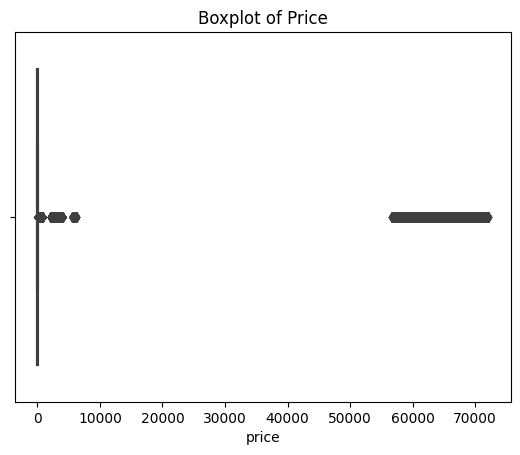

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot for price
sns.boxplot(x=multi_index_df['price'])
plt.title('Boxplot of Price')
plt.show()


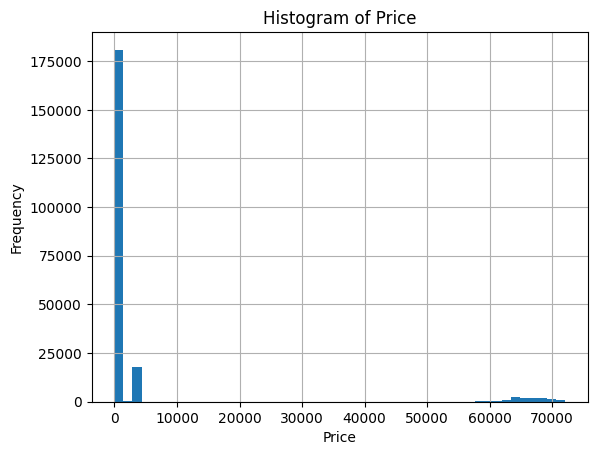

In [75]:
multi_index_df['price'].hist(bins=50)
plt.title('Histogram of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


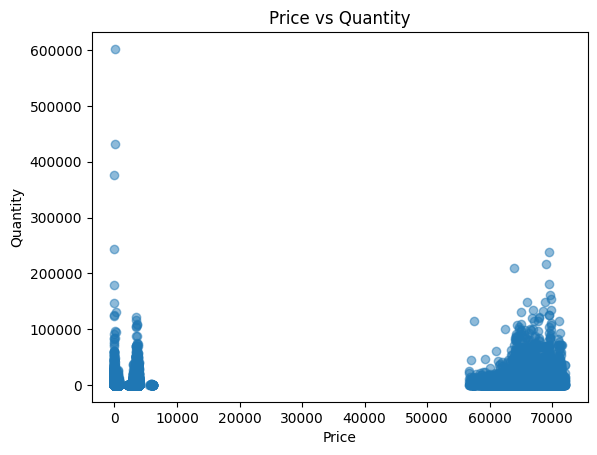

In [76]:
plt.scatter(multi_index_df['price'], multi_index_df['quantity'], alpha=0.5)
plt.title('Price vs Quantity')
plt.xlabel('Price')
plt.ylabel('Quantity')
plt.show()


In [85]:
multi_index_df

time     symbol  side       price   
Port_ID             Trade_Index                                               
3925368433214965504 0            1718899656000    SOLUSDT   BUY  132.537000  \
                    1            1718899618000   DOGEUSDT   BUY    0.121820   
                    2            1718899618000   DOGEUSDT   BUY    0.121820   
                    3            1718899616000   DOGEUSDT   BUY    0.121820   
                    4            1718899616000   DOGEUSDT   BUY    0.121820   
...                                        ...        ...   ...         ...   
3768170840939476993 211272       1718549875000  JASMYUSDT  SELL    0.035968   
                    211273       1718549875000  JASMYUSDT  SELL    0.035968   
                    211274       1718549875000  JASMYUSDT  SELL    0.035969   
                    211275       1718549875000  JASMYUSDT  SELL    0.035969   
                    211276       1718549875000  JASMYUSDT  SELL    0.035972   

                                      fee feeAsset     quantity quantityAsset   
Port_ID             Trade_Index                                                 
3925368433214965504 0           -0.994027     USDT  1988.055000          USDT  \
                    1           -0.279796     USDT  1398.980880          USDT   
                    2           -0.039494     USDT   197.470220          USDT   
                    3           -0.008284     USDT    16.567520          USDT   
                    4           -0.046109     USDT    92.217740          USDT   
...                                   ...      ...          ...           ...   
3768170840939476993 211272      -0.025070     USDT    50.139392          USDT   
                    211273      -0.008255     USDT    16.509312          USDT   
                    211274      -0.031545     USDT    63.089626          USDT   
                    211275      -0.031905     USDT    63.809006          USDT   
                    211276      -0.005018     USDT    10.036188          USDT   

                                 realizedProfit realizedProfitAsset baseAsset   
Port_ID             Trade_Index                                                 
3925368433214965504 0                       0.0                USDT       SOL  \
                    1                       0.0                USDT      DOGE   
                    2                       0.0                USDT      DOGE   
                    3                       0.0                USDT      DOGE   
                    4                       0.0                USDT      DOGE   
...                                         ...                 ...       ...   
3768170840939476993 211272                  0.0                USDT     JASMY   
                    211273                  0.0                USDT     JASMY   
                    211274                  0.0                USDT     JASMY   
                    211275                  0.0                USDT     JASMY   
                    211276                  0.0                USDT     JASMY   

                                     qty positionSide  activeBuy  
Port_ID             Trade_Index                                   
3925368433214965504 0               15.0         LONG       True  
                    1            11484.0         LONG      False  
                    2             1621.0         LONG      False  
                    3              136.0         LONG       True  
                    4              757.0         LONG       True  
...                                  ...          ...        ...  
3768170840939476993 211272        1394.0         BOTH      False  
                    211273         459.0         BOTH      False  
                    211274        1754.0         BOTH      False  
                    211275        1774.0         BOTH      False  
                    211276         279.0         BOTH      False  

[211277 rows x 14 columns]

In [96]:
# Get dimensions of the DataFrame
print("Shape:", multi_index_df.shape)

# Access the levels of the MultiIndex
print("Index Levels:", multi_index_df.index.levels)
print("Index Names:", multi_index_df.index.names)

# Access the column labels
print("Column Labels:", multi_index_df.columns)

Shape: (211277, 14)
Index Levels: [[3672754654734989568, 3733192481840423936, 3768170840939476993, 3784403294629753856, 3786761687746711808, 3788465932399412480, 3818233536529843712, 3819545518395756033, 3826087012661391104, 3858510226868015873, 3865845304835489536, 3878631538480067329, 3879821005658659073, 3880920727367689984, 3886752488982104320, 3887577207880438784, 3891020560590657281, 3907081197088384000, 3910887259807777281, 3910983669796782848, 3911997667197443328, 3914654298562589441, 3919174299855478272, 3923766029921022977, 3925368433214965504, 3926423286576838657, 3930688517098515713, 3931992636670880512, 3932103299427844097, 3935808725185052672, 3936410995029308417, 3937714876784951296, 3939318616482048768, 3939925275039085824, 3941019213896463617, 3942630767220672256, 3943533600390906881, 3944088772635000577, 3944239644144231424, 3944658614777849089, 3946087913459823360, 3949214983441029120, 3949329502284748801, 3951723256343550465, 3952087967771302912, 3953433416230728705

In [101]:
def clean_trading_data(df):
    """
    Clean and preprocess trading data while preserving the MultiIndex.
    
    Parameters:
    -----------
    df : pd.DataFrame
        Original trading history DataFrame with a MultiIndex
    
    Returns:
    --------
    pd.DataFrame
        Cleaned and processed trading data with the MultiIndex preserved
    """
    # 1. Create a copy to avoid modifying original data
    df_cleaned = df.copy()
    
    # 2. Convert time from millisecond timestamp to datetime
    df_cleaned['time'] = pd.to_datetime(df_cleaned['time'], unit='ms')
    
    # 3. Handle missing values
    numeric_columns = ['price', 'fee', 'quantity', 'realizedProfit']
    df_cleaned[numeric_columns] = df_cleaned[numeric_columns].fillna(0)
    
    # 4. Remove duplicate trades
    df_cleaned = df_cleaned[~df_cleaned.duplicated(subset=['time', 'symbol', 'side', 'price', 'quantity'])]
    
    # 5. Sort by MultiIndex levels and time
    df_cleaned.sort_values(by=['time'], inplace=True)
    
    # 6. Reconstruct MultiIndex if it was modified
    if not isinstance(df_cleaned.index, pd.MultiIndex):
        df_cleaned.set_index(df.index, inplace=True)
    
    return df_cleaned


In [112]:
cleaned_data = clean_trading_data(multi_index_df)


In [113]:
cleaned_data

time    symbol  side   
Port_ID             Trade_Index                                       
3932103299427844097 74854       2024-04-22 16:48:03   SOLUSDT  SELL  \
                    74853       2024-04-22 16:48:03   SOLUSDT  SELL   
3939925275039085824 63789       2024-04-22 16:59:56   APTUSDT  SELL   
3949214983441029120 179738      2024-04-22 17:01:18   APTUSDT  SELL   
3788465932399412480 45157       2024-04-22 17:07:27   XRPUSDT  SELL   
...                                             ...       ...   ...   
4021669203289716224 32456       2024-06-21 17:10:23   BTCUSDT  SELL   
3946087913459823360 133791      2024-06-21 17:10:50   RVNUSDT   BUY   
                    133790      2024-06-21 17:11:05   ARBUSDT  SELL   
                    133789      2024-06-21 17:11:11   RVNUSDT  SELL   
                    133788      2024-06-21 17:11:45  ARKMUSDT  SELL   

                                       price       fee feeAsset     quantity   
Port_ID             Trade_Index                                                
3932103299427844097 74854          153.52200 -0.690849     USDT   1381.69800  \
                    74853          153.52200 -0.076761     USDT    153.52200   
3939925275039085824 63789           10.06800 -0.040272     USDT     80.54400   
3949214983441029120 179738          10.08000 -0.012600     USDT     25.20000   
3788465932399412480 45157            0.54660 -0.326129     USDT    652.25778   
...                                      ...       ...      ...          ...   
4021669203289716224 32456        63832.60000 -2.004344     USDT  10021.71820   
3946087913459823360 133791           0.01984 -0.005000     USDT      9.99936   
                    133790           0.80750 -0.005006     USDT     10.01300   
                    133789           0.01983 -0.024698     USDT     49.39653   
                    133788           1.97970 -0.004949     USDT      9.89850   

                                quantityAsset  realizedProfit   
Port_ID             Trade_Index                                 
3932103299427844097 74854                USDT        0.180000  \
                    74853                USDT        0.020000   
3939925275039085824 63789                USDT        0.000000   
3949214983441029120 179738               USDT        0.000000   
3788465932399412480 45157                USDT        2.744590   
...                                       ...             ...   
4021669203289716224 32456                USDT       41.620700   
3946087913459823360 133791               USDT        0.000000   
                    133790               USDT        0.127859   
                    133789               USDT       -0.802668   
                    133788               USDT        0.112000   

                                realizedProfitAsset baseAsset       qty   
Port_ID             Trade_Index                                           
3932103299427844097 74854                      USDT       SOL     9.000  \
                    74853                      USDT       SOL     1.000   
3939925275039085824 63789                      USDT       APT     8.000   
3949214983441029120 179738                     USDT       APT     2.500   
3788465932399412480 45157                      USDT       XRP  1193.300   
...                                             ...       ...       ...   
4021669203289716224 32456                      USDT       BTC     0.157   
3946087913459823360 133791                     USDT       RVN   504.000   
                    133790                     USDT       ARB    12.400   
                    133789                     USDT       RVN  2491.000   
                    133788                     USDT      ARKM     5.000   

                                positionSide  activeBuy  
Port_ID             Trade_Index                          
3932103299427844097 74854               LONG      False  
                    74853               LONG      False  
3939925275039085824 63789   

In [114]:
# Get dimensions of the DataFrame
print("Shape:", cleaned_data.shape)

# Access the levels of the MultiIndex
print("Index Levels:", cleaned_data.index.levels)
print("Index Names:", cleaned_data.index.names)

# Access the column labels
print("Column Labels:", cleaned_data.columns)

Shape: (199740, 14)
Index Levels: [[3672754654734989568, 3733192481840423936, 3768170840939476993, 3784403294629753856, 3786761687746711808, 3788465932399412480, 3818233536529843712, 3819545518395756033, 3826087012661391104, 3858510226868015873, 3865845304835489536, 3878631538480067329, 3879821005658659073, 3880920727367689984, 3886752488982104320, 3887577207880438784, 3891020560590657281, 3907081197088384000, 3910887259807777281, 3910983669796782848, 3911997667197443328, 3914654298562589441, 3919174299855478272, 3923766029921022977, 3925368433214965504, 3926423286576838657, 3930688517098515713, 3931992636670880512, 3932103299427844097, 3935808725185052672, 3936410995029308417, 3937714876784951296, 3939318616482048768, 3939925275039085824, 3941019213896463617, 3942630767220672256, 3943533600390906881, 3944088772635000577, 3944239644144231424, 3944658614777849089, 3946087913459823360, 3949214983441029120, 3949329502284748801, 3951723256343550465, 3952087967771302912, 3953433416230728705

In [115]:
cleaned_data.loc[(3925368433214965504,1457)]

time                   2024-04-22 22:34:32
symbol                             BTCUSDT
side                                  SELL
price                              66712.7
fee                              -0.967334
feeAsset                              USDT
quantity                         1934.6683
quantityAsset                         USDT
realizedProfit                         0.0
realizedProfitAsset                   USDT
baseAsset                              BTC
qty                                  0.029
positionSide                         SHORT
activeBuy                            False
Name: (3925368433214965504, 1457), dtype: object

In [116]:
multi_index_df.loc[(3925368433214965504,1457)]

time                   1713825272000
symbol                       BTCUSDT
side                            SELL
price                        66712.7
fee                        -0.967334
feeAsset                        USDT
quantity                   1934.6683
quantityAsset                   USDT
realizedProfit                   0.0
realizedProfitAsset             USDT
baseAsset                        BTC
qty                            0.029
positionSide                   SHORT
activeBuy                      False
Name: (3925368433214965504, 1457), dtype: object

In [119]:
import pandas as pd
import numpy as np
from scipy import stats

# Step 1: Data Preparation and Initial Processing
def prepare_trading_data(df):
    """
    Prepare and clean the trading dataset
    
    Parameters:
    -----------
    df : pandas.DataFrame
        Raw trading dataset
    
    Returns:
    --------
    pandas.DataFrame
        Processed trading dataset
    """
    # 1.1 Create a comprehensive trade classification
    df['trade_type'] = df['side'] + '_' + df['positionSide']
    
    # 1.2 Calculate total trade value
    df['trade_value'] = df['price'] * df['quantity']
    
    return df

# Step 2: Performance Metrics Calculation
def calculate_account_metrics(account_trades):
    """
    Calculate comprehensive performance metrics for an account
    
    Parameters:
    -----------
    account_trades : pandas.DataFrame
        Trades for a single account
    
    Returns:
    --------
    dict
        Performance metrics for the account
    """
    # 2.1 Basic Metrics
    total_positions = len(account_trades)
    win_positions = len(account_trades[account_trades['realizedProfit'] > 0])
    
    # 2.2 Win Rate
    win_rate = win_positions / total_positions if total_positions > 0 else 0
    
    # 2.3 Return on Investment (ROI)
    total_investment = account_trades['trade_value'].sum()
    total_profit = account_trades['realizedProfit'].sum()
    roi = (total_profit / total_investment) * 100 if total_investment != 0 else 0
    
    # 2.4 Profit and Loss (PnL)
    pnl = total_profit
    
    # 2.5 Maximum Drawdown (MDD)
    cumulative_profit = account_trades['realizedProfit'].cumsum()
    cumulative_max = cumulative_profit.cummax()
    drawdowns = (cumulative_max - cumulative_profit) / cumulative_max
    mdd = drawdowns.max() * 100 if len(drawdowns) > 0 else 0
    
    # 2.6 Sharpe Ratio (assuming risk-free rate of 0)
    # We'll use daily returns for this calculation
    daily_returns = account_trades.groupby(pd.Grouper(key='time', freq='D'))['realizedProfit'].sum()
    sharpe_ratio = (daily_returns.mean() / daily_returns.std()) * np.sqrt(252) if daily_returns.std() != 0 else 0
    
    return {
        'total_positions': total_positions,
        'win_positions': win_positions,
        'win_rate': win_rate,
        'roi': roi,
        'pnl': pnl,
        'mdd': mdd,
        'sharpe_ratio': sharpe_ratio
    }

# Step 3: Feature Importance and Scoring
def calculate_feature_weights():
    """
    Define feature weights for ranking
    
    Returns:
    --------
    dict
        Weights for different performance metrics
    """
    return {
        'win_rate': 0.25,
        'roi': 0.25,
        'sharpe_ratio': 0.2,
        'total_positions': 0.15,
        'pnl': 0.15
    }

def score_accounts(account_metrics, feature_weights):
    """
    Create a composite score for account ranking
    
    Parameters:
    -----------
    account_metrics : dict
        Dictionary of account performance metrics
    feature_weights : dict
        Weights for different metrics
    
    Returns:
    --------
    float
        Composite performance score
    """
    # Normalize metrics before scoring
    def normalize(value, metric):
        # Different normalization strategies based on metric
        if metric in ['win_rate', 'roi', 'sharpe_ratio']:
            return value  # These are already percentage/ratio
        elif metric == 'total_positions':
            return np.log1p(value)  # Log transform to reduce skew
        elif metric == 'pnl':
            return np.sign(value) * np.log1p(abs(value))
    
    normalized_metrics = {
        metric: normalize(value, metric) 
        for metric, value in account_metrics.items()
    }
    
    # Calculate weighted score
    score = sum(
        normalized_metrics[metric] * weight 
        for metric, weight in feature_weights.items()
    )
    
    return score

# Step 4: Main Analysis Function
def analyze_trading_performance(df):
    """
    Comprehensive trading performance analysis
    
    Parameters:
    -----------
    df : pandas.DataFrame
        Raw trading dataset
    
    Returns:
    --------
    tuple
        Performance metrics DataFrame and top 20 accounts
    """
    # Prepare data
    prepared_df = prepare_trading_data(df)
    
    # Group by Port_ID (assuming this represents different accounts)
    feature_weights = calculate_feature_weights()
    
    # Calculate metrics for each account
    account_performance = {}
    for port_id, account_trades in prepared_df.groupby('Port_ID'):
        metrics = calculate_account_metrics(account_trades)
        metrics['score'] = score_accounts(metrics, feature_weights)
        account_performance[port_id] = metrics
    
    # Convert to DataFrame
    performance_df = pd.DataFrame.from_dict(account_performance, orient='index')
    performance_df.index.name = 'Port_ID'
    
    # Rank accounts
    performance_df['rank'] = performance_df['score'].rank(ascending=False)
    top_20_accounts = performance_df.nlargest(20, 'score')
    
    return performance_df, top_20_accounts

# Example Usage
def main(df):
    # Perform analysis
    full_performance, top_20 = analyze_trading_performance(df)
    
    # Save results
    full_performance.to_csv('account_performance_metrics.csv')
    top_20.to_csv('top_20_accounts.csv')
    
    print("Top 20 Accounts Analysis:")
    print(top_20)
    
    return full_performance, top_20

# Note: Replace df with your actual DataFrame when running
result, top_accounts = main(cleaned_data)

Top 20 Accounts Analysis:
                     total_positions  win_positions  win_rate        roi   
Port_ID                                                                    
3977234346014419201               71             33  0.464789  37.252522  \
4029506971304830209               50              3  0.060000  22.078439   
4023697433751327232               42              4  0.095238  22.824929   
3891020560590657281              414            277  0.669082   6.820154   
4021243448368889856             5873           2229  0.379533   0.003136   
4041860229502600193               95             38  0.400000   0.010053   
4023697881318718465               67              6  0.089552  15.303464   
4004713168329653760               27              2  0.074074  19.885897   
3983074113875692800               42             14  0.333333  18.832605   
4030708912786799105               56              1  0.017857  15.007670   
4029507714735307777               49              2  0.040816 

In [120]:
cleaned_data

time    symbol  side   
Port_ID             Trade_Index                                       
3932103299427844097 74854       2024-04-22 16:48:03   SOLUSDT  SELL  \
                    74853       2024-04-22 16:48:03   SOLUSDT  SELL   
3939925275039085824 63789       2024-04-22 16:59:56   APTUSDT  SELL   
3949214983441029120 179738      2024-04-22 17:01:18   APTUSDT  SELL   
3788465932399412480 45157       2024-04-22 17:07:27   XRPUSDT  SELL   
...                                             ...       ...   ...   
4021669203289716224 32456       2024-06-21 17:10:23   BTCUSDT  SELL   
3946087913459823360 133791      2024-06-21 17:10:50   RVNUSDT   BUY   
                    133790      2024-06-21 17:11:05   ARBUSDT  SELL   
                    133789      2024-06-21 17:11:11   RVNUSDT  SELL   
                    133788      2024-06-21 17:11:45  ARKMUSDT  SELL   

                                       price       fee feeAsset     quantity   
Port_ID             Trade_Index                                                
3932103299427844097 74854          153.52200 -0.690849     USDT   1381.69800  \
                    74853          153.52200 -0.076761     USDT    153.52200   
3939925275039085824 63789           10.06800 -0.040272     USDT     80.54400   
3949214983441029120 179738          10.08000 -0.012600     USDT     25.20000   
3788465932399412480 45157            0.54660 -0.326129     USDT    652.25778   
...                                      ...       ...      ...          ...   
4021669203289716224 32456        63832.60000 -2.004344     USDT  10021.71820   
3946087913459823360 133791           0.01984 -0.005000     USDT      9.99936   
                    133790           0.80750 -0.005006     USDT     10.01300   
                    133789           0.01983 -0.024698     USDT     49.39653   
                    133788           1.97970 -0.004949     USDT      9.89850   

                                quantityAsset  realizedProfit   
Port_ID             Trade_Index                                 
3932103299427844097 74854                USDT        0.180000  \
                    74853                USDT        0.020000   
3939925275039085824 63789                USDT        0.000000   
3949214983441029120 179738               USDT        0.000000   
3788465932399412480 45157                USDT        2.744590   
...                                       ...             ...   
4021669203289716224 32456                USDT       41.620700   
3946087913459823360 133791               USDT        0.000000   
                    133790               USDT        0.127859   
                    133789               USDT       -0.802668   
                    133788               USDT        0.112000   

                                realizedProfitAsset baseAsset       qty   
Port_ID             Trade_Index                                           
3932103299427844097 74854                      USDT       SOL     9.000  \
                    74853                      USDT       SOL     1.000   
3939925275039085824 63789                      USDT       APT     8.000   
3949214983441029120 179738                     USDT       APT     2.500   
3788465932399412480 45157                      USDT       XRP  1193.300   
...                                             ...       ...       ...   
4021669203289716224 32456                      USDT       BTC     0.157   
3946087913459823360 133791                     USDT       RVN   504.000   
                    133790                     USDT       ARB    12.400   
                    133789                     USDT       RVN  2491.000   
                    133788                     USDT      ARKM     5.000   

                                positionSide  activeBuy  trade_type   
Port_ID             Trade_Index                                       
3932103299427844097 74854               LONG      False   SELL_LONG  \
                    74853               LONG   